In [6]:
# importing libraries

import pandas as pd
        
#Importing data
df_1 = pd.read_csv('train.csv', header=0)

print(df_1.shape, 'shape after importing data')

#Counting and cleaning data with dropna
print('NaN in df = ', df_1.isnull().sum().sum())
df = df_1.dropna()

print('NaN in df = ', df.isnull().sum().sum())

print(df_1.shape, 'before') #Shape before cleaning
print(df.shape, 'after :)') #Shape after cleaning

(8693, 14) shape after importing data
NaN in df =  2324
NaN in df =  0
(8693, 14) before
(6606, 14) after :)


In [7]:
df_cualitative = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck'])
df_quantitative = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Destination', 'HomePlanet', 'Age','CryoSleep', 'VIP', 'Transported'])

print('features cualitative')
print(df_cualitative.head())
print('features quantitative')
print(df_quantitative.head())

features cualitative
  HomePlanet CryoSleep  Destination   Age    VIP  Transported
0     Europa     False  TRAPPIST-1e  39.0  False        False
1      Earth     False  TRAPPIST-1e  24.0  False         True
2     Europa     False  TRAPPIST-1e  58.0   True        False
3     Europa     False  TRAPPIST-1e  33.0  False        False
4      Earth     False  TRAPPIST-1e  16.0  False         True
features quantitative
   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0


# Encoding, join and split, drop NaN again and scale! 

I admit this was the most challenging part of the excercise, because if we try to split the data like "classic way" we can get so much issues with the model, like:
1) The code can't step forward due NaN values generated by the encoder.

2) We can't use OneHotEncoder because cualitative features is discrete, so... the encoder fail with the task.

3) LabelBinarize also doesn't works, and LabelEncoder is only for target features(y), and of course we can't, because we need to transform and clean all the data before think to split it in X and y. So, the unique solution was OrdinalEncoder to encode the discrete qualitative features.

4) If we use EDA we will waste so much time and lines of code trying to get the feature relevance, but the continuos quantitative data of expenses in fact all is heuristic wc¡¡each column with the other one, due the lack of information is a must to create a new column with the total of expenses and take this data like a quantity of expense, and no like score or something like that.

5) Also, we must use two drop NaN to get cleaned data, and some join/split tables to do great work.

6) If you use correlation to do EDA for feature selection, you will see so much correlation between quantitative data with each other quantitative data, but in fact less correlation with target(Transported), and this means: We can reduce the data, and to achieve it we must to use product or summatory, I prefer summatory to get the final bill spended in the spaceship. This column is col_total_billed

7) Due we cannot treat all data in the same 'table', we need to split and join this tables with each other to finally achieve an accurate transformation of the data. 

I know this preprocessing can be confused in the code, so I draw 'map' to guide you with steps from our original 'df' to splitted data 'X = []' and 'y = []', where X is an DataFrame and y is numpy integer array. I hope this map will help you to follow the steps of preprocessing. 

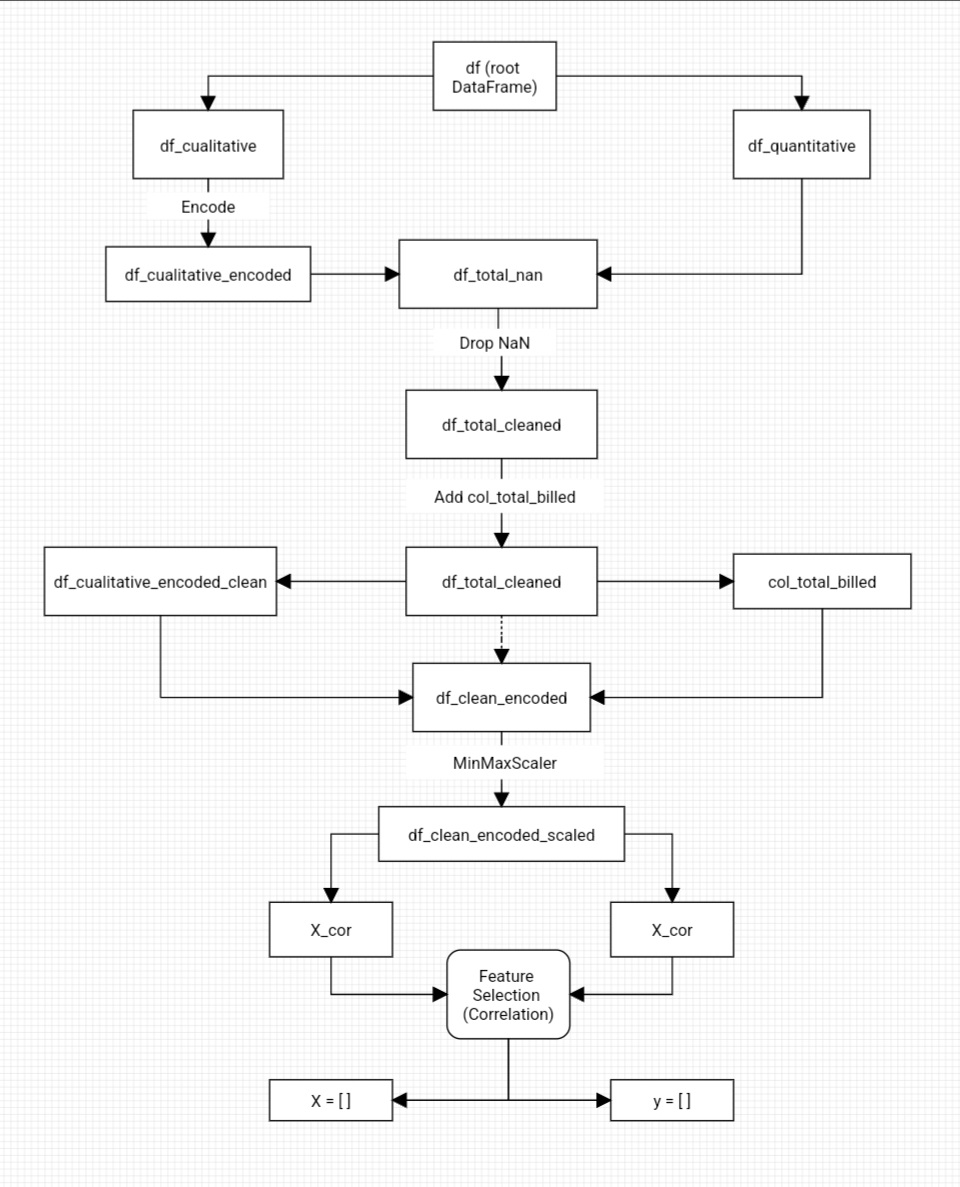

In [8]:
from sklearn.preprocessing import OrdinalEncoder

# 1) Encode df_cualitative and convertion in DataFrame
ore = OrdinalEncoder()
df_cualitative_to_encode = ore.fit_transform(df_cualitative)
df_cualitative_encoded = pd.DataFrame(df_cualitative_to_encode)
print('df_cualitative_encoded')
print(df_cualitative_encoded.head())


# 2) Join both tables to delete NaN data generated by encoder
print('JOINED TABLES TO DROP ALL NAN VALUES: "df_cualitative_encoded" + "df_quantitative" = df_total_nan')
df_total_nan = df_cualitative_encoded.join(df_quantitative)

# 2.1) Print dimensions and detect nan values
print('NaN in df_total_nan = ', df_total_nan.isnull().sum().sum())
print('Shape of our df with NaN =', df_total_nan.shape)

# 2.2) Print the final DataFrame = df_total_cleaned, ready to split the data into X and y
print('DROPED ALL NAN VALUES AND SAVED AS TABLE = df_total_cleaned (4999, 10)')
df_total_cleaned = df_total_nan.dropna()
print('NaN in df_total_cleaned = ', df_total_cleaned.isnull().sum().sum())
print('Shape of our df without NaN =', df_total_cleaned.shape)

# 2.3) Create new col to sum all quantitative features = col_total_billed (by each passenger(rows))
cols_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_total_cleaned['total_billed'] = df[cols_to_sum].sum(axis=1)



# 3) Split the joined table (df_total_cleaned) to df_cualitative_encoded and col_total_billed
print('df_total_cleaned')
print(df_total_cleaned.head()) #See the table
print(df_total_cleaned.shape)


df_cualitative_encoded_clean = df_total_cleaned.iloc[: , 0:6] 
col_total_billed = df_total_cleaned.iloc[:, -1]

print('df_cualitative_encoded_clean = cualitative features and age in df_total_cleaned')
print(df_cualitative_encoded_clean.head())
print(df_cualitative_encoded_clean.shape)

print('col_total_billed = summatory by each row of quantitative features in df_total_cleaned')
print(col_total_billed.head())
print(col_total_billed.shape)

print('NaN in df_total_cleaned = ', df_total_cleaned.isnull().sum().sum())
print('NaN in df_cualtitative_encoded_clean = ', df_cualitative_encoded_clean.isnull().sum().sum())
print('NaN in col_total_billed = ', col_total_billed.isnull().sum().sum())


df_cualitative_encoded
     0    1    2     3    4    5
0  1.0  0.0  2.0  39.0  0.0  0.0
1  0.0  0.0  2.0  24.0  0.0  1.0
2  1.0  0.0  2.0  58.0  1.0  0.0
3  1.0  0.0  2.0  33.0  0.0  0.0
4  0.0  0.0  2.0  16.0  0.0  1.0
JOINED TABLES TO DROP ALL NAN VALUES: "df_cualitative_encoded" + "df_quantitative" = df_total_nan
NaN in df_total_nan =  8035
Shape of our df with NaN = (6606, 11)
DROPED ALL NAN VALUES AND SAVED AS TABLE = df_total_cleaned (4999, 10)
NaN in df_total_cleaned =  0
Shape of our df without NaN = (4999, 11)
df_total_cleaned
     0    1    2     3    4    5  RoomService  FoodCourt  ShoppingMall  \
0  1.0  0.0  2.0  39.0  0.0  0.0          0.0        0.0           0.0   
1  0.0  0.0  2.0  24.0  0.0  1.0        109.0        9.0          25.0   
2  1.0  0.0  2.0  58.0  1.0  0.0         43.0     3576.0           0.0   
3  1.0  0.0  2.0  33.0  0.0  0.0          0.0     1283.0         371.0   
4  0.0  0.0  2.0  16.0  0.0  1.0        303.0       70.0         151.0   

      Spa  V

C:\Users\NIKKI RANI\AppData\Local\Temp\ipykernel_14376\3071642376.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_cleaned['total_billed'] = df[cols_to_sum].sum(axis=1)


The previous code was about to encode cualitative features, join to delete all NaN generated by encoder, and split it again in clean tables of cualtitative features (df_cualitative_encoded_clean) and quantitative features (col_total_billed)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# 4) Join df_cualitative encoded with col_total_billed in one DataFrame
df_clean_encoded = df_cualitative_encoded_clean.join(col_total_billed)
print('OUR LAST DATAFRAME = df_clean_encoded')
print(df_clean_encoded.head())



# 5) Normalizing the joined DataFrame df_clean_encoded to df_clean_encoded_scaled
scaler = MinMaxScaler()
df_to_scale = scaler.fit_transform(df_clean_encoded)
df_clean_encoded_scaled = pd.DataFrame(df_to_scale)
print('df_clean_encoded_scaled')
print(df_clean_encoded_scaled.head())


OUR LAST DATAFRAME = df_clean_encoded
     0    1    2     3    4    5  total_billed
0  1.0  0.0  2.0  39.0  0.0  0.0           0.0
1  0.0  0.0  2.0  24.0  0.0  1.0         736.0
2  1.0  0.0  2.0  58.0  1.0  0.0       10383.0
3  1.0  0.0  2.0  33.0  0.0  0.0        5176.0
4  0.0  0.0  2.0  16.0  0.0  1.0        1091.0


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

With data correctly transformed in the final DataFrame 'df_clean_encoded_scaled' we can start with the model, among all classifier we must use decision tree classifier, because Gaussian NaiveBayes don't handle well when there are many categorical features in X(input), and our data have both continuous quantitative features (col_total_billed) and cualitative discrete features like booleans (df_clean_encoded), so GaussianNB can't handle that differences with features. 

Hence, due our differents features a smart decission is DecisionTreeClassifier, although the final graph is not quite readable, is so much more readable than the plot of decision region of GaussianNB, well, I really think is impossible to plot the GaussianNB decision region without use math to join features with wage or something like that, because we have 6 features as input (multi-class), and the options with the kind of this data is limited: Naive Bayes, Decision Tree and SVM, and this last one have the same problem as Naive Bayes. The last option by discard is: Yes, Decision Tree!

In [23]:
#Finally splitting X and y data
X_cor = df_clean_encoded_scaled.drop(columns=[5])
y_cor = df_clean_encoded_scaled.iloc[:, 5].to_numpy()

print('X data')
print(X_cor.head())
print('y data')
print(y_cor)
print('Col_name[index]')
print('HomePlanet[0], CryoSleep[1], Destination[2], Age[3],')
print('VIP[4], Transported[y][5], total_billed[6]')


X data
     0    1    2         3    4         6
0  0.5  0.0  1.0  0.493671  0.0  0.000000
1  0.0  0.0  1.0  0.303797  0.0  0.020452
2  0.5  0.0  1.0  0.734177  1.0  0.288521
3  0.5  0.0  1.0  0.417722  0.0  0.143830
4  0.0  0.0  1.0  0.202532  0.0  0.030317
y data
[0. 1. 0. ... 1. 0. 1.]
Col_name[index]
HomePlanet[0], CryoSleep[1], Destination[2], Age[3],
VIP[4], Transported[y][5], total_billed[6]


# Feature selection of all data.

Now, before split data and test one by one the features and test result is better to use a correlation matrix to evaluate the correlation between 'y' (column 5) with the other columns, the list of columns is like I printed before:

1. Column name [index of DataFrame]
1. HomePlanet[0]
1. CryoSleep[1]
1. Destination[2]
1. Age[3]
1. VIP[4]
1. Transported[y][5]
1. total_billed[6]

<AxesSubplot:>

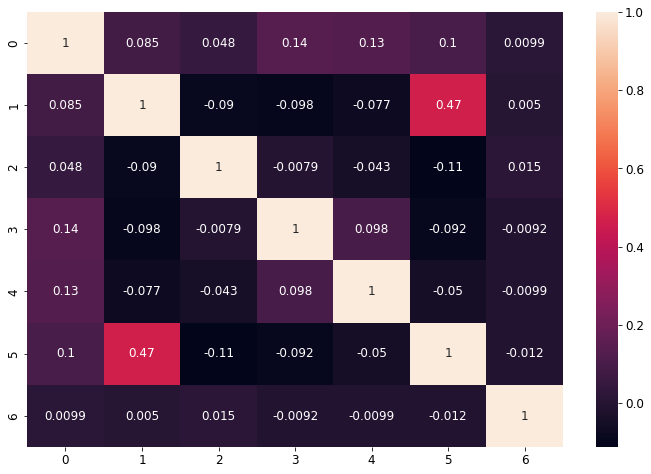

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean_encoded_scaled.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

# Model and optimization

Finally we completed all the rout map of preprocessing, it's time to split the data and build the structure using GridSearchCV to test all the possibilities of hyperparameters to the model.

In [25]:
X = df_clean_encoded_scaled.drop(columns=[5,6,4])
y = df_clean_encoded_scaled.iloc[:, 5].to_numpy()


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

model_gridcv = DecisionTreeClassifier()

params = {'criterion' : ('gini', 'entropy'), 
          'splitter' : ('best', 'random'),
          'max_depth' : (5, 6, 7, 8, 9, 10),
          'max_features': ('auto', 'log2')
         }

grid = GridSearchCV(model_gridcv, params, scoring='accuracy') 

grid.fit(X, y) 

print(grid.cv_results_['rank_test_score'])
print(grid.cv_results_['mean_test_score'])
print(grid.best_score_)
print(grid.best_params_)

[ 1 35  5 17 15 24 41 12 40 19 37 13 18  8 21 22 39 14 42 33 47 45 48 26
 28 32  3 34 10 31  4 20  7 11  2 25 29 23  6  9 27 36 30 16 44 38 46 43]
[0.73634675 0.72394575 0.73234755 0.72894535 0.72914515 0.72754474
 0.72134414 0.72974394 0.72134695 0.72834675 0.72253974 0.72914595
 0.72854555 0.73114715 0.72774595 0.72774515 0.72174354 0.72914555
 0.71994394 0.72454454 0.71774294 0.71874354 0.71534274 0.72654575
 0.72554775 0.72534515 0.73454715 0.72414254 0.73014655 0.72554374
 0.73374735 0.72794635 0.73174815 0.72974795 0.73554695 0.72714535
 0.72554515 0.72774494 0.73194675 0.73094615 0.72594434 0.72314555
 0.72554494 0.72894575 0.71934394 0.72214394 0.71814294 0.71994254]
0.7363467467467467
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best', max_features='log2')
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Metrics and visualization

Of course is necessary to use cross_val_score to really know wether the data fits well or not with the model, because high train and test score really doesn't means that we completed the work correctly, because we splitted the data in specific way, but what happens if we test the data in differents way that we choose? that's the key, and the reason to use cross_val_score with Kfolds to get the mean of all of these possible outcome, and get more wide vission about the variance of data. Finally with the result of the mean it's possible to evaluate this results with the result of our outcome of the model. Hence, I will use classification_report and accuracy score.

In [27]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, X, y, cv= k_folds)
print('Cross Validation Score: ', scores)
print('Average CV Score: ', scores.mean())



from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(cm)
print('Score of the model: ', ac)
print('Training set score: ', model.score(X_train, y_train))
print('Test set score: ', model.score(X_test, y_test))


Cross Validation Score:  [0.738      0.724      0.738      0.734      0.71       0.724
 0.726      0.756      0.738      0.70140281]
Average CV Score:  0.7289402805611221
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75       739
         1.0       0.80      0.60      0.69       761

    accuracy                           0.72      1500
   macro avg       0.74      0.72      0.72      1500
weighted avg       0.74      0.72      0.72      1500

[[625 114]
 [302 459]]
Score of the model:  0.7226666666666667
Training set score:  0.7479279794226922
Test set score:  0.7226666666666667


As we can see, the model doesn't have any overfitting and underfitting, is pretty balanced, so we can conclude our model was correctly designed. With all of these results it's possible to plot ROC_AUC score and the decision tree graph. 

ROC AUC score:  0.724445614078762


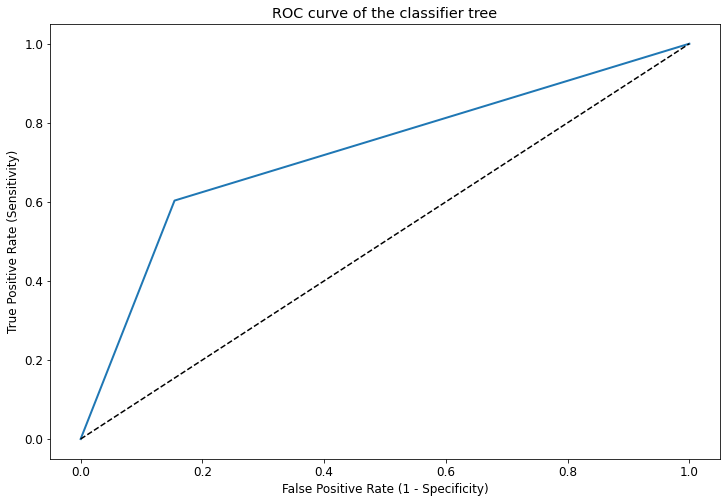

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC AUC
RocAuc = roc_auc_score(y_test, y_pred)
print('ROC AUC score: ', RocAuc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve of the classifier tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Use test.csv to predict the values

In [29]:
df_test = pd.read_csv('test.csv', header=0)
df_2 = df_test.dropna()

features_test = df_2.loc[:, ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age']]
print('features_test')
print(features_test.head())

#Build dataset of x categorical features to encode it
print('X_features_test')
X_features_test = features_test.loc[:, ['HomePlanet', 'CryoSleep', 'Destination']]
print(X_features_test.head())

print('Age of passenger = The only quantitative_feature')
X_ages = features_test.loc[:, ['Age']]
print(X_ages.head())

print('PassengerId = This column is to use with the predict solve')
X_passengers = features_test.loc[:, ['PassengerId']]
print(X_passengers.head())

features_test
  PassengerId HomePlanet CryoSleep  Destination   Age
0     0013_01      Earth      True  TRAPPIST-1e  27.0
1     0018_01      Earth     False  TRAPPIST-1e  19.0
2     0019_01     Europa      True  55 Cancri e  31.0
3     0021_01     Europa     False  TRAPPIST-1e  38.0
4     0023_01      Earth     False  TRAPPIST-1e  20.0
X_features_test
  HomePlanet CryoSleep  Destination
0      Earth      True  TRAPPIST-1e
1      Earth     False  TRAPPIST-1e
2     Europa      True  55 Cancri e
3     Europa     False  TRAPPIST-1e
4      Earth     False  TRAPPIST-1e
Age of passenger = The only quantitative_feature
    Age
0  27.0
1  19.0
2  31.0
3  38.0
4  20.0
PassengerId = This column is to use with the predict solve
  PassengerId
0     0013_01
1     0018_01
2     0019_01
3     0021_01
4     0023_01


In [30]:
#1) Encoding X_features
oe = OrdinalEncoder()
X_encoded_features_test = oe.fit_transform(X_features_test)
X_encoded_features_test = pd.DataFrame(X_encoded_features_test)
print('X_encoded_features_test')
print(X_encoded_features_test.head())


#2) Build Dataframe of X joining X_age
X_test_encoded = X_encoded_features_test.join(X_ages)
print('X_test_encoded')
print(X_test_encoded.head())


#3) Scaling X and y
scaler = MinMaxScaler()
X_test_encoded_scaled = scaler.fit_transform(X_test_encoded)
X_test_encoded_scaled = pd.DataFrame(X_test_encoded_scaled)
print('X_test_encoded_scaled')
print(X_test_encoded_scaled.head())


# 4) Join with Passenger ID to drop all nans
print('test_csv')
print(X_test_encoded_scaled.head())
test_csv = X_passengers.join(X_test_encoded_scaled)
print('NaN in test_csv = ', test_csv.isnull().sum().sum())
print('Shape of our df with NaN =', test_csv.shape)

# 4.1) Drop all Nan in test_csv
print('DROPED ALL NAN VALUES AND SAVED AS TABLE = test_csv_cleaned (2511,5)')
test_csv_cleaned = test_csv.dropna()
print(test_csv_cleaned.head())
print('NaN in df_total_cleaned = ', test_csv_cleaned.isnull().sum().sum())
print('Shape of our df without NaN =', test_csv_cleaned.shape)


X_encoded_features_test
     0    1    2
0  0.0  1.0  2.0
1  0.0  0.0  2.0
2  1.0  1.0  0.0
3  1.0  0.0  2.0
4  0.0  0.0  2.0
X_test_encoded
     0    1    2   Age
0  0.0  1.0  2.0  27.0
1  0.0  0.0  2.0  19.0
2  1.0  1.0  0.0  31.0
3  1.0  0.0  2.0  38.0
4  0.0  0.0  2.0  20.0
X_test_encoded_scaled
     0    1    2         3
0  0.0  1.0  1.0  0.341772
1  0.0  0.0  1.0  0.240506
2  0.5  1.0  0.0  0.392405
3  0.5  0.0  1.0  0.481013
4  0.0  0.0  1.0  0.253165
test_csv
     0    1    2         3
0  0.0  1.0  1.0  0.341772
1  0.0  0.0  1.0  0.240506
2  0.5  1.0  0.0  0.392405
3  0.5  0.0  1.0  0.481013
4  0.0  0.0  1.0  0.253165
NaN in test_csv =  3080
Shape of our df with NaN = (3281, 5)
DROPED ALL NAN VALUES AND SAVED AS TABLE = test_csv_cleaned (2511,5)
  PassengerId    0    1    2         3
0     0013_01  0.0  1.0  1.0  0.341772
1     0018_01  0.0  0.0  1.0  0.240506
2     0019_01  0.5  1.0  0.0  0.392405
3     0021_01  0.5  0.0  1.0  0.481013
4     0023_01  0.0  0.0  1.0  0.253165
Na

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Only get labels of PassengerId with prediction

To fit PassengerId and the final predict the data must have the same shape, so... again, join and split!

In [31]:
test_passenger = test_csv_cleaned.loc[:, ['PassengerId']]
pred_test_csv = test_csv_cleaned.loc[:,[0,1,2,3]]
print('test_passenger')
print(test_passenger.head())
print('Shape PassengerId = ', test_passenger.shape)

print('pred_test_csv')
print(pred_test_csv.head())
print('Shape pred_test_csv = ', pred_test_csv.shape)

test_passenger
  PassengerId
0     0013_01
1     0018_01
2     0019_01
3     0021_01
4     0023_01
Shape PassengerId =  (2511, 1)
pred_test_csv
     0    1    2         3
0  0.0  1.0  1.0  0.341772
1  0.0  0.0  1.0  0.240506
2  0.5  1.0  0.0  0.392405
3  0.5  0.0  1.0  0.481013
4  0.0  0.0  1.0  0.253165
Shape pred_test_csv =  (2511, 4)


In [32]:

prediction = model.predict(pred_test_csv)
prediction = pd.DataFrame(prediction)


submission_csv = test_passenger.join(prediction)

print('Where 0=False and 1=True')

print(submission_csv.head(20))

Where 0=False and 1=True
   PassengerId    0
0      0013_01  1.0
1      0018_01  0.0
2      0019_01  1.0
3      0021_01  0.0
4      0023_01  0.0
5      0027_01  0.0
7      0032_01  0.0
8      0032_02  0.0
9      0033_01  0.0
10     0037_01  0.0
12     0040_02  1.0
13     0042_01  1.0
14     0046_01  0.0
16     0046_03  0.0
17     0047_01  1.0
20     0048_01  1.0
22     0054_01  0.0
23     0054_02  0.0
24     0054_03  1.0
25     0055_01  0.0


In [33]:
# But the statement require False and True instead of 0 and 1...
final_submission_csv = submission_csv.replace({0.0: 'False', 1.0:'True'})
print(final_submission_csv.head(20))



   PassengerId      0
0      0013_01   True
1      0018_01  False
2      0019_01   True
3      0021_01  False
4      0023_01  False
5      0027_01  False
7      0032_01  False
8      0032_02  False
9      0033_01  False
10     0037_01  False
12     0040_02   True
13     0042_01   True
14     0046_01  False
16     0046_03  False
17     0047_01   True
20     0048_01   True
22     0054_01  False
23     0054_02  False
24     0054_03   True
25     0055_01  False
